# Signals Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from scipy.stats import norm, binomtest
import math

def round_up(value, n):
    '''
    value: float
    n: int, number of decimal places to round up to
    '''
    factor = 10 ** n
    return math.ceil(value * factor) / factor

round_up(8.595406, 3)

8.596

In [3]:
data = pd.read_csv(f'BBO_2024-41-TEST.csv')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)
data

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 10:03:58.595406,544,563,A,VXV4,16.00,50,0.0,0,S
2024-10-06 10:03:58.595406,627,635,A,VXV4,16.55,1,0.0,0,S
2024-10-06 10:03:58.595406,627,636,A,VXV4,16.55,2,0.0,0,S
2024-10-06 10:03:58.595406,627,637,A,VXV4,16.60,1,0.0,0,S
2024-10-06 10:03:58.595406,627,638,A,VXV4,16.60,2,0.0,0,S
...,...,...,...,...,...,...,...,...,...
2024-10-11 16:00:01.575645,1491615,1491615,D,VXH5,11.80,2,0.0,0,S
2024-10-11 16:00:01.575645,1491618,1491618,D,VXMX4,0.00,0,0.0,0,S
2024-10-11 16:00:01.575645,1491618,1491619,D,VXMV4,0.00,0,0.0,0,S


## 1 Preprocess data
1. `Time` can be viewed an idetifier to events. groupby `Time` and take the last value, then we can see the complete impact of one transaction to the bbo.
2. calculate our theroatical value as `Theo`

In [9]:
#df = data[data['TradingStatus']=='T'].groupby(['Time','Symbol']).last()[['BidPrice','BidQuantity','AskPrice','AskQuantity']]
df = data[data['TradingStatus']=='T']
df['Theo'] = (df['BidPrice'] * df['AskQuantity'] + df['AskPrice'] * df['BidQuantity']) / (df['BidQuantity'] + df['AskQuantity'])
df

C:\Users\warre\AppData\Local\Temp\ipykernel_42160\528318803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Theo'] = (df['BidPrice'] * df['AskQuantity'] + df['AskPrice'] * df['BidQuantity']) / (df['BidQuantity'] + df['AskQuantity'])


,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus,Theo
Time,,,,,,,,,,
2024-10-06 17:00:00.000686,43033,43086,E,VXV4,20.30,221,20.35,38,T,20.342664
2024-10-06 17:00:00.000686,43033,43087,E,VXX4,19.25,127,19.30,104,T,19.277489
2024-10-06 17:00:00.000686,43088,43090,E,VXV4,20.30,221,20.35,37,T,20.342829
2024-10-06 17:00:00.000686,43088,43091,E,VXX4,19.25,126,19.30,104,T,19.277391
2024-10-06 17:00:00.000686,43088,43094,E,VXV4,20.30,221,20.35,36,T,20.342996
...,...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:59.060798,1467390,1467390,D,VXMZ4,18.80,22,18.98,10,T,18.923750
2024-10-11 15:59:59.063235,1467393,1467393,D,VXMZ4,18.80,22,19.05,20,T,18.930952
2024-10-11 15:59:59.065735,1467396,1467396,D,VXMF5,19.05,21,19.28,10,T,19.205806


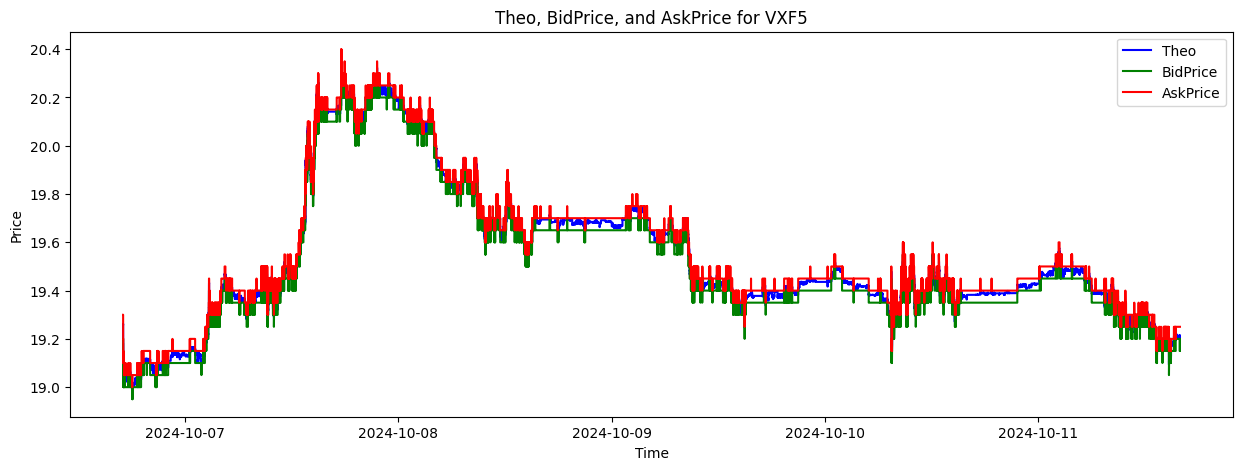

In [5]:
df_vxf5 = df[df.index.get_level_values('Symbol') == 'VXF5']

# plot Theo, BidPrice, and AskPrice as step functions with backward fill (bfill)
plt.figure(figsize=(15, 5))
plt.step(df_vxf5.index.get_level_values('Time'), df_vxf5['Theo'], label='Theo', color='blue', where='post')
plt.step(df_vxf5.index.get_level_values('Time'), df_vxf5['BidPrice'], label='BidPrice', color='green', where='post')
plt.step(df_vxf5.index.get_level_values('Time'), df_vxf5['AskPrice'], label='AskPrice', color='red', where='post')
plt.title('Theo, BidPrice, and AskPrice for VXF5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## 2 Identify signals

Change Signals:

1. We are going to check whether a given order had a size of 100 or more. TBD
2. We are going to implement for a given order crossing theo by more than 50 points.
3. TBD: What if theo drops by a certain 

In [ ]:
def calculate_signal1(df, ticksize = 0.05):
    """
    Calculates signal1: agressive buyer.

    Args:
        data (pd.DataFrame): The input data with 'BidPrice' and 'AskPrice'.
        signal_name (str): The name of the signal column to create.
    """
    df[['BidPrice_shift1', 'AskPrice_shift1']] = df[['BidPrice', 'AskPrice']].shift(1)
    df['Signal1'] = np.where(
        (df['BidPrice'] > df['BidPrice_shift1']) & (df['AskPrice'] > df['AskPrice_shift1']),
        1, 
        0
    )


def calculate_signal2(df, ticksize = 0.05):
    """
    Calculates signal2: agressive seller.

    Args:
        data (pd.DataFrame): The input data with 'BidPrice' and 'AskPrice'.
        signal_name (str): The name of the signal column to create.
    """
    df[['BidPrice_shift1', 'AskPrice_shift1']] = df[['BidPrice', 'AskPrice']].shift(1)
    df['Signal2'] = np.where(
        (df['BidPrice'] < df['BidPrice_shift1']) & (df['AskPrice'] < df['AskPrice_shift1']),
        1, 
        0
    )

def calc_theo_cross(df, threshold=0.5, ticksize = 0.05):
    """
    Computes whether the current bid or ask crosses the previous theo by threshold ticks:
    for bid, we assume it goes above prev theo by at least 0.8 ticks
    for ask, we assume it goes below prev theo by at least 0.8 ticks

    """
    df['Theo_lagged'] = df['Theo'].shift(1)
    df['THEO_CROSS_BID'] = (df['BidPrice'] - df['Theo_lagged'])
    df["THEO_CROSS_ASK"] = (df['Theo_lagged'] - df['AskPrice'])
    
    #Absolute value versions of the signal
    """
    df["SIG_THEOCROSS_BID"] = np.where(
        ((df['BidPrice'] - df['Theo_lagged']).abs() >= threshold),
        1, 
        0
    )

    df["SIG_THEOCROSS_ASK"] = np.where(
        ((df['AskPrice'] - df['Theo_lagged']).abs() >= threshold),
        1, 
        0
    )
    """
    #Non Absolute Value Impl
    df["SIG_THEOCROSS_BID"] = np.where(
        (df["THEO_CROSS_BID"] / float(ticksize) >= threshold),
        1, 
        0
    )

    df["SIG_THEOCROSS_ASK"] = np.where(
        (df["THEO_CROSS_ASK"] / float(ticksize) >= threshold),
        1, 
        0
    )

def calc_theo_cross_ask(df, threshold=0.5, ticksize = 0.05):
    """
    Computes whether the current bid or ask crosses the previous theo by threshold ticks:
    for bid, we assume it goes above prev theo by at least 0.8 ticks
    for ask, we assume it goes below prev theo by at least 0.8 ticks

    """
    df['Theo_lagged'] = df['Theo'].shift(1)
    df["THEO_CROSS_ASK"] = (df['Theo_lagged'] - df['AskPrice'])

    df["SIG_THEOCROSS_ASK"] = np.where(
        (df["THEO_CROSS_ASK"] / float(ticksize) >= threshold),
        1, 
        0
    )
    
def calc_theo_cross_bid(df, threshold=0.5, ticksize = 0.05):
    """
    Computes whether the current bid or ask crosses the previous theo by threshold ticks:
    for bid, we assume it goes above prev theo by at least 0.8 ticks
    for ask, we assume it goes below prev theo by at least 0.8 ticks

    """
    df['Theo_lagged'] = df['Theo'].shift(1)
    df['THEO_CROSS_BID'] = (df['BidPrice'] - df['Theo_lagged'])

    #Non Absolute Value Impl
    df["SIG_THEOCROSS_BID"] = np.where(
        (df["THEO_CROSS_BID"] / float(ticksize) >= threshold),
        1, 
        0
    )

def order_size_reached_S1(df, ticksize=0.05, min_size=100, max_size=3000):
    df[['BidPrice_shift1', 'AskPrice_shift1']] = df[['BidPrice', 'AskPrice']].shift(1)
    df[['BidQuantity_shift1', 'AskQuantity_shift1']] = df[['BidQuantity', 'AskQuantity']].shift(1)

    quantity_change = (
        df['AskQuantity_shift1'].sub(df['AskQuantity']).abs() +
        df['BidQuantity_shift1'].sub(df['BidQuantity']).abs()
    )

    # TODO: (df['BidPrice'] < df['BidPrice_shift1']) | (df['AskPrice'] < df['AskPrice_shift1'])
    # Does at least one side have to go up?
    condition = (
        (df['BidPrice'] == df['BidPrice_shift1']) &
        (df['AskPrice'] == df['AskPrice_shift1']) &
        (quantity_change >= min_size) &
        (quantity_change <= max_size)
    )

    df['SIG_AMOUNT_SAME_BBO'] = np.where(condition, 1, 0)


def order_size_reached_S2(df, ticksize=0.05, min_size=100, max_size=3000):
    df[['BidPrice_shift1', 'AskPrice_shift1']] = df[['BidPrice', 'AskPrice']].shift(1)
    df[['BidQuantity_shift1', 'AskQuantity_shift1']] = df[['BidQuantity', 'AskQuantity']].shift(1)

    quantity_change = (
    
        df['AskQuantity_shift1'].sub(df['AskQuantity']).abs() +
        df['BidQuantity_shift1'].sub(df['BidQuantity']).abs()
    )

    # TODO: (df['BidPrice'] < df['BidPrice_shift1']) | (df['AskPrice'] < df['AskPrice_shift1'])
    # Does at least one side have to go up?
    condition = (
        (df['BidPrice'] > df['BidPrice_shift1']) &
        (quantity_change >= min_size) &
        (quantity_change <= max_size)
    )

    df['SIG_AMOUNT_DIFF_BBO'] = np.where(condition, 1, 0)






signal_function_map = {
    'SIG_THEOCROSS_ASK': calc_theo_cross_ask,
    'SIG_THEOCROSS_BID': calc_theo_cross_bid,
    'SIG_AMOUNT_SAME_BBO': order_size_reached_S1,
    #'SIG_AMOUNT_DIFF_BBO': order_size_reached_S2,
}

,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,Theo,BidPrice_shift1,AskPrice_shift1,BidQuantity_shift1,AskQuantity_shift1,SIG_AMOUNT_SAME_BBO
Time,,,,,,,,,,,
2024-10-06 17:00:00.000686,VXV4,20.3,221,20.35,35,20.343164,NaN,NaN,NaN,NaN,0
2024-10-06 17:00:00.055626,VXV4,20.3,217,20.35,35,20.343056,20.3,20.35,221.0,35.0,0
2024-10-06 17:00:00.055644,VXV4,20.3,217,20.35,47,20.341098,20.3,20.35,217.0,35.0,0
2024-10-06 17:00:00.055653,VXV4,20.3,197,20.35,47,20.340369,20.3,20.35,217.0,47.0,0
2024-10-06 17:00:00.055670,VXV4,20.3,152,20.35,47,20.338191,20.3,20.35,197.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:58.000675,VXV4,21.2,30,21.25,100,21.211538,21.2,21.25,48.0,100.0,0
2024-10-11 15:59:58.000782,VXV4,21.2,30,21.25,108,21.210870,21.2,21.25,30.0,100.0,0
2024-10-11 15:59:58.003223,VXV4,21.2,30,21.25,101,21.211450,21.2,21.25,30.0,108.0,0


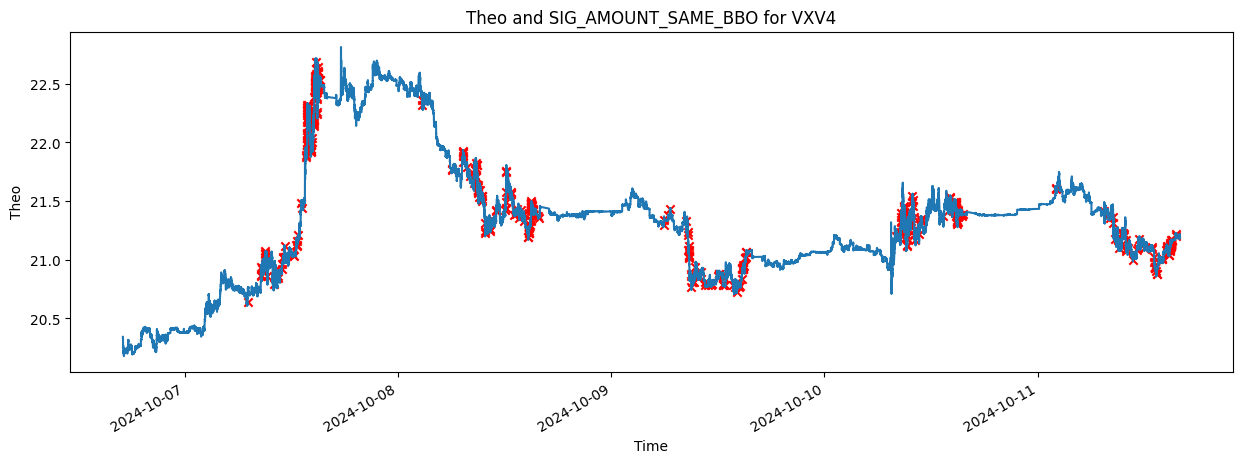

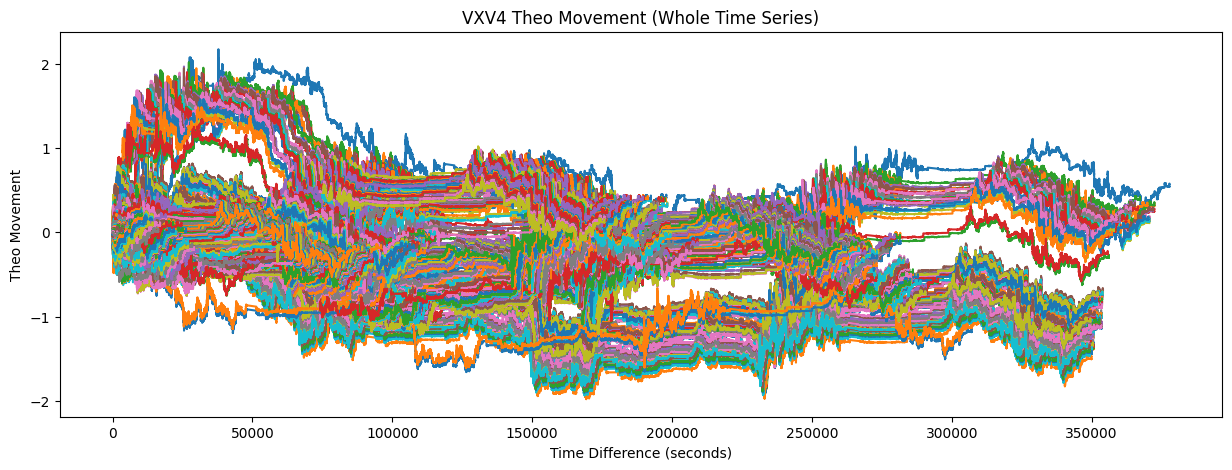

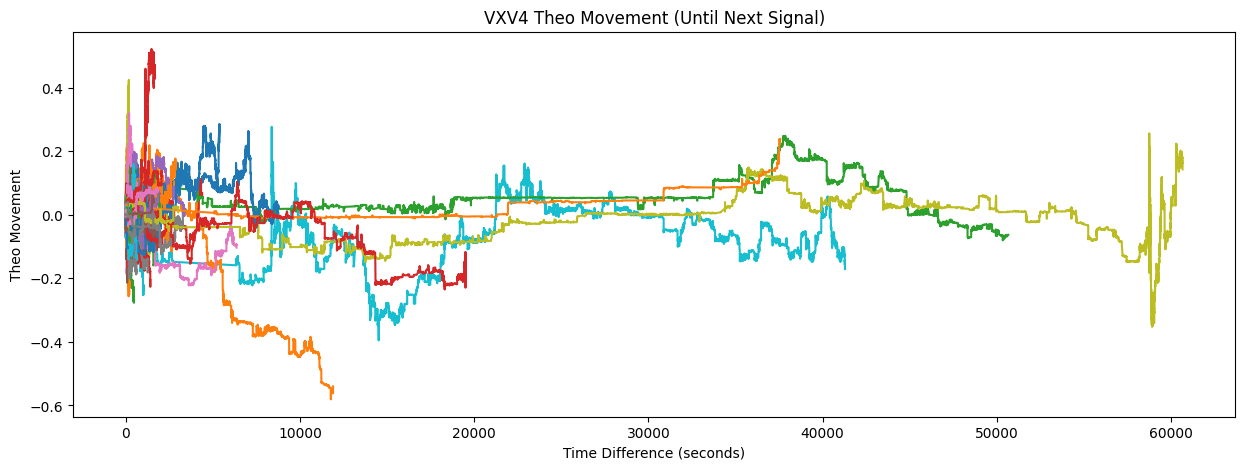

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


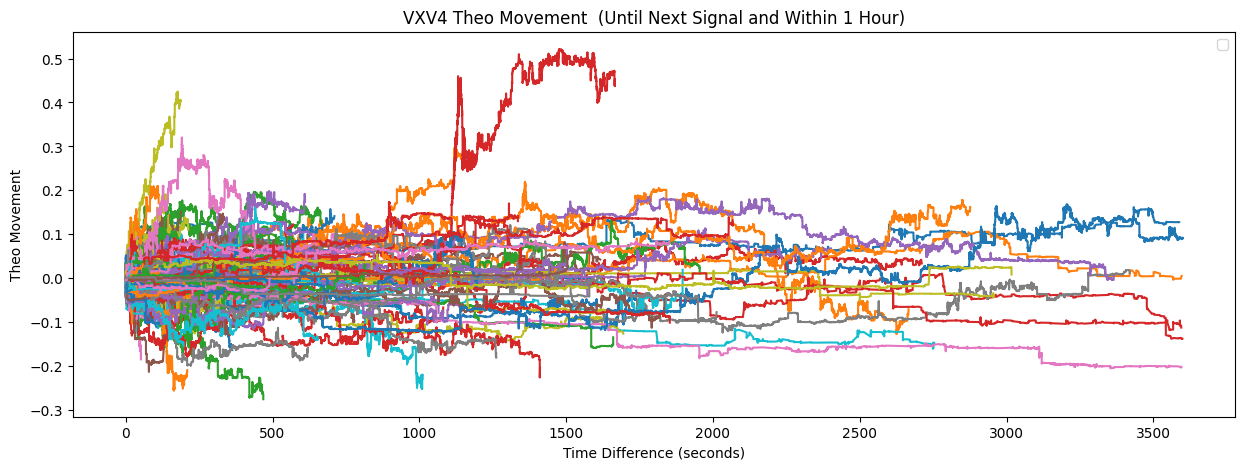

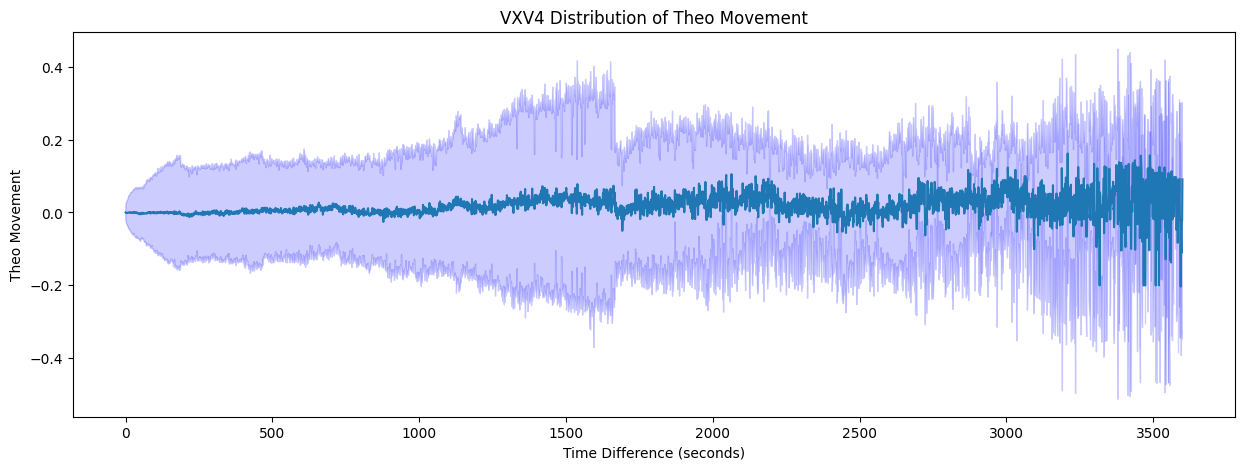

In [7]:
cur_sig = "SIG_AMOUNT_SAME_BBO"

symbolList = df.index.get_level_values(1).unique()
symbolList = ['VXV4']  # for testing
ticksize = [0.05]
for symbol in symbolList:
    df_sub = df[df.index.get_level_values(1)==symbol].sort_values('Time').reset_index('Symbol')
    signal_function_map[cur_sig](df_sub)
    display(df_sub)
    
    signal1_timestamps = df_sub[df_sub[cur_sig] == 1].index
    
    # Plot1: Theo movement and signals
    plt.figure(figsize=(15, 5))
    df_sub['Theo'].plot(label=symbol)
    plt.scatter(signal1_timestamps, df_sub.loc[signal1_timestamps, 'Theo'], color='red', marker='x', label='Signal_THEO_CROSS')
    plt.title(f'Theo and {cur_sig} for {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Theo')
    plt.show()
    

    # Plot2: Theo movement after each signal
    ## version1: plot the whole time series
    plt.figure(figsize=(15, 5))
    for timestamp in signal1_timestamps:
        theo_diff = df_sub.loc[timestamp:, 'Theo'] - df_sub.loc[timestamp, 'Theo']
        time_diff = (df_sub.loc[timestamp:].index - timestamp).total_seconds()
        plt.plot(time_diff, theo_diff)
    
    plt.title(f'{symbol} Theo Movement (Whole Time Series)')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Theo Movement')
    plt.show()

    ## version2: plot the time series from a signal up to the point where the next signal occurs 
    ## (assumption: a signal is valid until the next signal)
    plt.figure(figsize=(15, 5)) 
    for i in range(len(signal1_timestamps)):
        if i == len(signal1_timestamps) - 1:
            theo_diff = df_sub.loc[signal1_timestamps[i]:, 'Theo'] - df_sub.loc[signal1_timestamps[i], 'Theo']
            time_diff = (df_sub.loc[signal1_timestamps[i]:].index - signal1_timestamps[i]).total_seconds()
        else:
            theo_diff = df_sub.loc[signal1_timestamps[i]:signal1_timestamps[i+1], 'Theo'] - df_sub.loc[signal1_timestamps[i], 'Theo']
            time_diff = (df_sub.loc[signal1_timestamps[i]:signal1_timestamps[i+1]].index - signal1_timestamps[i]).total_seconds()
        
        plt.plot(time_diff, theo_diff)
    
    plt.title(f'{symbol} Theo Movement (Until Next Signal)')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Theo Movement')
    plt.show()


    ## version3: plot the time series until the next signal and within a short time horizon
    ## (assumption: a signal is valid until the next signal within a short time horizon)
    theo_movements = []
    plt.figure(figsize=(15, 5))

    for i, ts in enumerate(signal1_timestamps):
            if i == len(signal1_timestamps) - 1:
                theo_diff = df_sub.loc[ts:, 'Theo'] - df_sub.loc[ts, 'Theo']
                time_diff = (df_sub.loc[ts:].index - ts).total_seconds()
            else:
                next_ts = signal1_timestamps[i + 1]
                theo_diff = df_sub.loc[ts:next_ts, 'Theo'] - df_sub.loc[ts, 'Theo']
                time_diff = (df_sub.loc[ts:next_ts].index - ts).total_seconds()

            mask = time_diff <= 3600
            theo_movements.append((time_diff[mask], theo_diff[mask]))
            plt.plot(time_diff[mask], theo_diff[mask])

    plt.title(f'{symbol} Theo Movement  (Until Next Signal and Within 1 Hour)')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Theo Movement')
    plt.legend()
    plt.show()


    # Plot 3: Distribution of Theo Movement
    # calculate the mean and standard deviation of the theo movement for each time difference
    all_time_diffs = np.concatenate([tm[0] for tm in theo_movements])
    all_theo_diffs = np.concatenate([tm[1] for tm in theo_movements])
    signal_idxs = np.concatenate([[i] * len(tm[0]) for i, tm in enumerate(theo_movements)])
    df_movements = pd.DataFrame({
            'TimeDiff': all_time_diffs,
            'TheoMovement': all_theo_diffs,
            'SignalIdx': signal_idxs
        })
    df_movements['TimeDiffRounded'] = df_movements['TimeDiff'].apply(lambda x: round_up(x, 0)) # round up the time difference to the nearest second
    grouped = df_movements.groupby(['SignalIdx','TimeDiffRounded']).last().reset_index()
    grouped = grouped.groupby('TimeDiffRounded').agg(['mean', 'std'])

    mean_theo = grouped['TheoMovement']['mean']
    std_theo = grouped['TheoMovement']['std']

    plt.figure(figsize=(15, 5))
    plt.plot(mean_theo.index, mean_theo, label='Mean Theo Movement')
    plt.fill_between(
        mean_theo.index,
        mean_theo - 2 * std_theo,
        mean_theo + 2 * std_theo,
        color='blue', alpha=0.2, label='±2 Std Dev'
    )
    plt.title(f'{symbol} Distribution of Theo Movement')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Theo Movement')
    plt.show()



In [ ]:
df_sub

,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,Theo,Theo_lagged,THEO_CROSS_ASK,SIG_THEOCROSS_ASK
Time,,,,,,,,,
2024-10-06 17:00:00.000686,VXV4,20.3,221,20.35,35,20.343164,NaN,NaN,0
2024-10-06 17:00:00.055626,VXV4,20.3,217,20.35,35,20.343056,20.343164,-0.006836,0
2024-10-06 17:00:00.055644,VXV4,20.3,217,20.35,47,20.341098,20.343056,-0.006944,0
2024-10-06 17:00:00.055653,VXV4,20.3,197,20.35,47,20.340369,20.341098,-0.008902,0
2024-10-06 17:00:00.055670,VXV4,20.3,152,20.35,47,20.338191,20.340369,-0.009631,0
...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:58.000675,VXV4,21.2,30,21.25,100,21.211538,21.216216,-0.033784,0
2024-10-11 15:59:58.000782,VXV4,21.2,30,21.25,108,21.210870,21.211538,-0.038462,0
2024-10-11 15:59:58.003223,VXV4,21.2,30,21.25,101,21.211450,21.210870,-0.039130,0


Plot 2: 

Version 1 shows the entire theoretical price movement for every signal, resulting in repetitive overlaps.

Version 2 eliminates overlaps by stopping each signal's impact at the next signal, reducing redundancy.

Version 3 further refines Version 2 by adding a time constraint.

Plot 3:

Since timestamps have high precision and are initially continuous, the likelihood of identical time differences is extremely low. 

To address this, we round the time differences to a specified precision, effectively grouping them into intervals (or "bins") for analysis. 

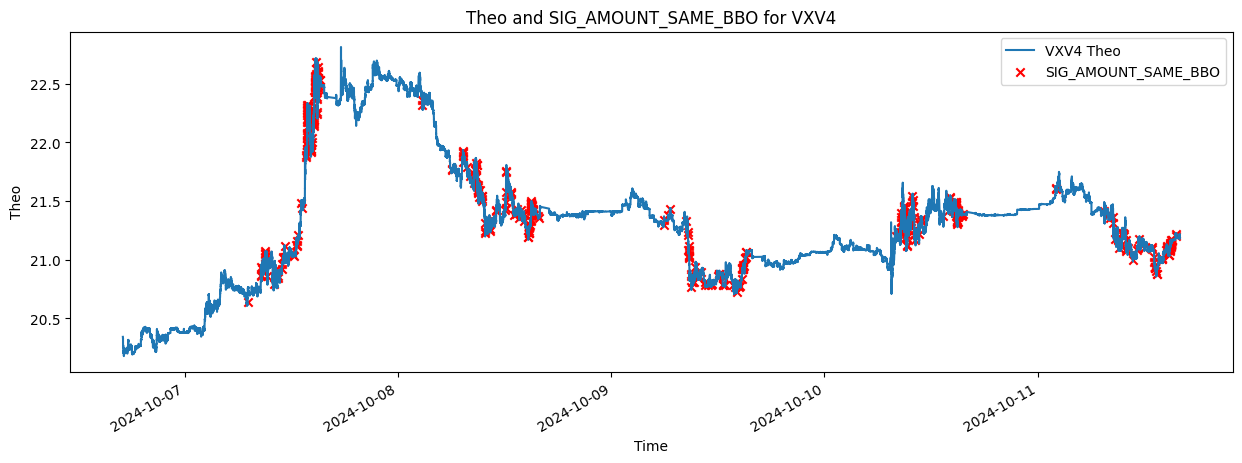

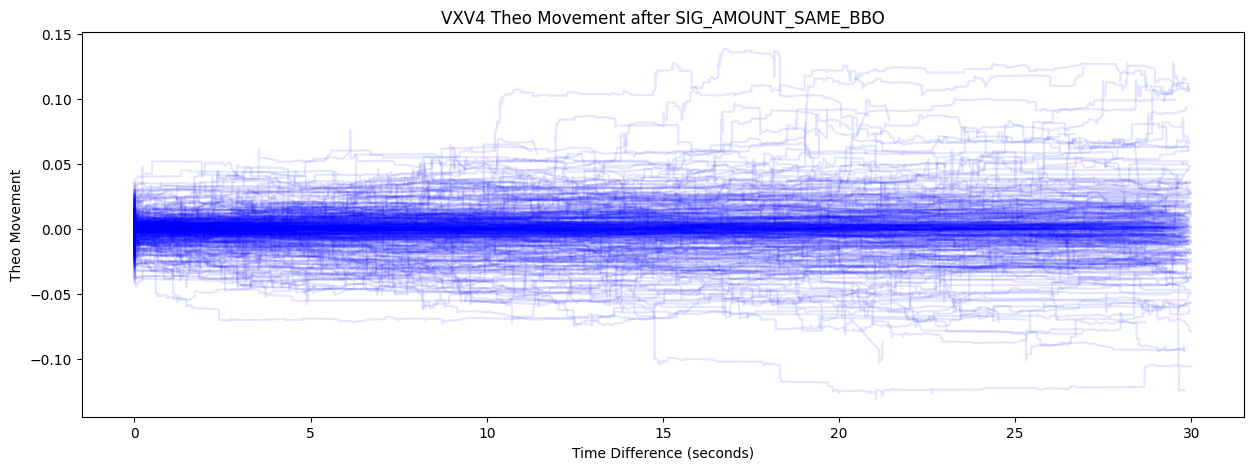

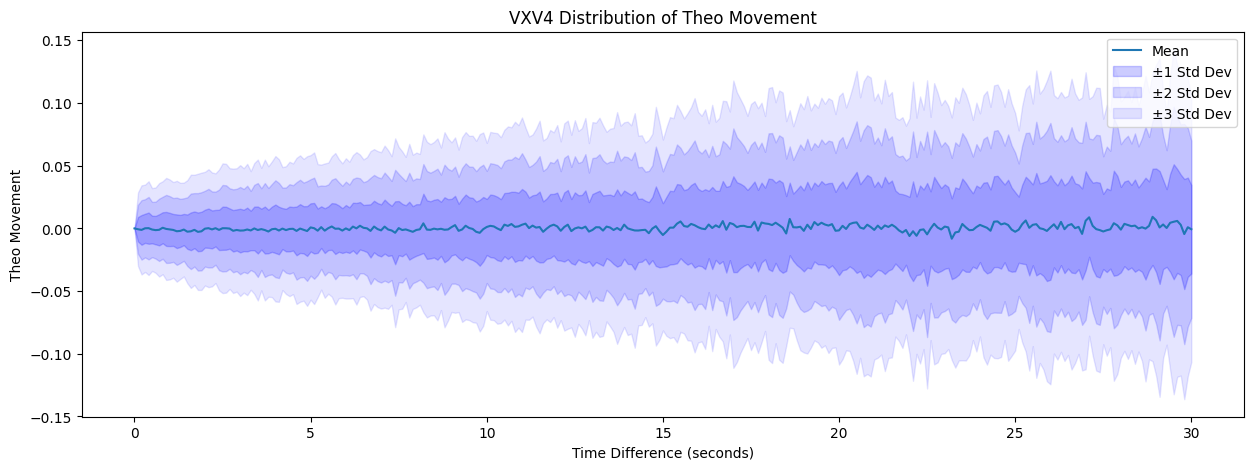

In [ ]:
# A refined function of visualiation
def plot_theo_movement(df, signal_function_map, signal_name, max_seconds=30, round_precision=1):
    """
    Plots the theoretical price movement after each signal, along with a distribution of movements.

    Args:
        max_seconds (int): Maximum time difference in seconds to consider for plotting.
        round_precision (int): Decimal precision for rounding time differences in total seconds.
    """
    symbol_list = df.index.get_level_values(1).unique()
    symbol_list = ['VXV4']

    for symbol in symbol_list:
        df_sub = df[df.index.get_level_values(1) == symbol].sort_values('Time').reset_index('Symbol')
        
        # Calculate the signal
        signal_func = signal_function_map[signal_name]
        signal_func(df_sub)

        # Get the signal timestamps
        signal_timestamps = df_sub[df_sub[signal_name] == 1].index

        # Plot 1: Theo and Signal
        plt.figure(figsize=(15, 5))
        df_sub['Theo'].plot(label=f'{symbol} Theo')
        plt.scatter(
            df_sub.loc[signal_timestamps].index, 
            df_sub.loc[signal_timestamps, 'Theo'], 
            color='red', marker='x', label=signal_name
        )
        plt.title(f'Theo and {signal_name} for {symbol}')
        plt.xlabel('Time')
        plt.ylabel('Theo')
        plt.legend()
        plt.show()

        # Plot 2: Theo Movement after signals
        theo_movements = []
        plt.figure(figsize=(15, 5))

        for i, ts in enumerate(signal_timestamps):
            if i == len(signal_timestamps) - 1:
                theo_diff = df_sub.loc[ts:, 'Theo'] - df_sub.loc[ts, 'Theo']
                time_diff = (df_sub.loc[ts:].index - ts).total_seconds()
            else:
                next_ts = signal_timestamps[i + 1]
                theo_diff = df_sub.loc[ts:next_ts, 'Theo'] - df_sub.loc[ts, 'Theo']
                time_diff = (df_sub.loc[ts:next_ts].index - ts).total_seconds()

            mask = time_diff <= max_seconds
            theo_movements.append((time_diff[mask], theo_diff[mask]))
            plt.plot(time_diff[mask], theo_diff[mask],color='blue', alpha=0.1,)

        plt.title(f'{symbol} Theo Movement after {signal_name}')
        plt.xlabel('Time Difference (seconds)')
        plt.ylabel('Theo Movement')
        plt.show()

        # Plot 3: Distribution of Theo Movement
        all_time_diffs = np.concatenate([tm[0] for tm in theo_movements])
        all_theo_diffs = np.concatenate([tm[1] for tm in theo_movements])
        signal_idxs = np.concatenate([[i] * len(tm[0]) for i, tm in enumerate(theo_movements)])
        df_movements = pd.DataFrame({
            'TimeDiff': all_time_diffs,
            'TheoMovement': all_theo_diffs,
            'SignalIdx': signal_idxs
        })
        df_movements['TimeDiffRounded'] = df_movements['TimeDiff'].apply(lambda x: round_up(x, round_precision))
        grouped = df_movements.groupby(['SignalIdx','TimeDiffRounded']).last().reset_index()
        grouped = grouped.groupby('TimeDiffRounded').agg(['mean', 'std'])

        mean_theo = grouped['TheoMovement']['mean']
        std_theo = grouped['TheoMovement']['std']


        plt.figure(figsize=(15, 5))

        # Plot the mean Theo movement
        plt.plot(mean_theo.index, mean_theo, label='Mean')

        # Plot the ±1 std deviation range
        plt.fill_between(
            mean_theo.index,
            mean_theo - std_theo,
            mean_theo + std_theo,
            color='blue', alpha=0.2, label='±1 Std Dev'
        )

        # Plot the ±2 std deviation range
        plt.fill_between(
            mean_theo.index,
            mean_theo - 2 * std_theo,
            mean_theo + 2 * std_theo,
            color='blue', alpha=0.15, label='±2 Std Dev'
        )

        # Plot the ±3 std deviation range
        plt.fill_between(
            mean_theo.index,
            mean_theo - 3 * std_theo,
            mean_theo + 3 * std_theo,
            color='blue', alpha=0.1, label='±3 Std Dev'
        )

        # Add title and labels
        plt.title(f'{symbol} Distribution of Theo Movement')
        plt.xlabel('Time Difference (seconds)')
        plt.ylabel('Theo Movement')

        # Add legend
        plt.legend()

        # Show the plot
        plt.show()


plot_theo_movement(df, signal_function_map, 'SIG_AMOUNT_SAME_BBO', max_seconds=30, round_precision=1)

## 3 Validate signals
We are looking for some statistical evidence to determine the significance of the sign of theo movements in response to these signals. Theo movement refers to the change in theoretical price following a signal over a specified time difference.

### 3.1 T-Test 
The t-test evaluates whether the theo movements exhibit a significant deviation from the hypothesized mean， which is 0 in this case.


1. **Assumptions**
- **Independence of Observations**: Each observation in the sample must be independent of the others.
- **Normality of the Population**: The population from which the sample is drawn should follow a normal distribution. For large sample sizes ($n \geq 30$), the Central Limit Theorem often allows relaxation of this assumption.



2. **Hypotheses**:
- **Null Hypothesis** $H_0: \bar{X} = 0$
- **Alternative Hypothesis**:
  - For two-tailed test: $H_1: \bar{X} \neq 0$
  - For an upper-tailed test: $H_1: \bar{X} > 0$
  - For a lower-tailed test: $H_1: \bar{X} < 0$

3. **Test Statistic**:
$
   t = \frac{\bar{X}}{\frac{s}{\sqrt{n}}}
$

4. **P-Value and Decision Rule**:
- **Two-Tailed Test**
  $
  p_{two-tailed} = P(T \geq |t_{obs}|) + P(T \leq -|t_{obs}|)
  $
  ; Reject $H_0$ if $p < \alpha$.
- **Upper-Tail Test**:
  $
  p_{upper-tail} = P(T \geq t_{obs})
  $
  ; Reject $H_0$ if $p < \alpha$.

- **Lower-Tail Test**:
  $
  p_{lower-tail} = P(T \leq t_{obs})
  $
  ; Reject $H_0$ if $p < \alpha$.

### 3.2 Binomial Test 
Binomial test is used to determine whether the observed number of successes in a binary experiment deviates significantly from the expected number under a specified probability. In this case, it assesses whether the proportion of positive movements differs significantly from 50%.
  
1. **Advantages**:
- Does not assume normality of the data.
- Useful when the distribution of theo movements is skewed or contains outliers.

2. **Hypotheses**:
- **Null Hypothesis**: $H_0: p = 0.5$
- **Alternative Hypothesis ($H_1$)**:
  - For an **upper-tailed test**: $H_1: p > 0.5$
  - For a **lower-tailed test**: $H_1: p < 0.5$

3. **Binomial Distribution**: $ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $

4. **P-Value and Decision Rule**:
- **Upper-Tailed Test**:
  $
  p = P(X \geq k_{\text{obs}}) = \sum_{k=k_{\text{obs}}}^{n} \binom{n}{k} p^k (1-p)^{n-k}
  $
  ; Reject $H_0$ if $p < \alpha$.

- **Lower-Tailed Test**:
  $
  p = P(X \leq k_{obs}) = \sum_{k=0}^{k_{\text{obs}}} \binom{n}{k} p^k (1-p)^{n-k}
  $
  ; Reject $H_0$ if $p < \alpha$.

C:\Users\warre\AppData\Local\Temp\ipykernel_31936\3327703693.py:23: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  df['Shifted_Time'] = df.index + pd.Timedelta(time_diff)


{'Symbol': 'VXV4',
 'Signal Name': 'SIG_AMOUNT_SAME_BBO',
 'Time Diff': '1S',
 'Theo_diff > 0 (%)': 48.6486,
 'Theo_diff < 0 (%)': 50.3861,
 'Upper-Tail P-value(T-test)': 0.9550044402328837,
 'Lower-Tail P-value(T-test)': 0.044995559767116305,
 'Upper-Tail P-value(Binomial)': 0.7450527229866285,
 'Lower-Tail P-value(Binomial)': 0.2549472770133715,
 'PnL': 0.462,
 'Count': 518.0,
 'Mean': -0.0009,
 'Std': 0.0119,
 'Min': -0.0524,
 '25%': -0.0047,
 '50%': -0.0,
 '75%': 0.0038,
 'Max': 0.0518,
 'Kurtosis': 3.3767,
 'Skewness': -0.2806}

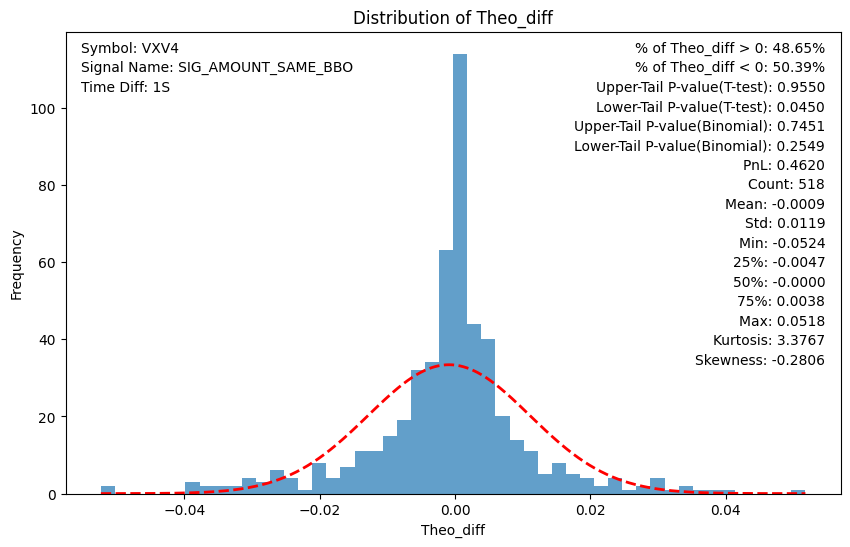

In [ ]:
def calculate_theo_stats(df, signal_function_map, signal_name, ticksize=0.05, time_diff='1S'):
    """
    Calculate statistics on the theoretical price difference based on specified conditions.
    
    Args:
        df (pd.DataFrame): Input dataframe with 'Theo', 'BidPrice', 'AskPrice' columns.
                           Assumes data is indexed by datetime.
        signal_function_map (dict): Mapping of signal names to their corresponding functions.
        signal_name (str): Name of the signal to apply.
        time_diff (str): Time difference to calculate the 'Theo' difference.
    
    Returns:
        dict: A dictionary containing descriptive statistics, significance test results, and configuration details.
        plt.Figure: The figure object containing the plot.
    """
    symbol = df['Symbol'].iloc[0]
    
    # Calculate the signal
    signal_func = signal_function_map[signal_name]
    signal_func(df, ticksize)
    
    # Find the closest timestamp to the shifted timestamps, and calculate the 'Theo' difference
    df['Shifted_Time'] = df.index + pd.Timedelta(time_diff)
    df = pd.merge_asof(
        df[[signal_name,'Theo','Shifted_Time']].reset_index(), 
        df[['Theo']].reset_index(), 
        left_on='Shifted_Time', 
        right_on='Time', 
        direction='backward',
        suffixes=('', '_shifted')
    ).set_index('Time')
    df['Theo_diff'] = df['Theo_shifted'] - df['Theo']
    # display(df[df[signal_name] == 1])
    df.drop(columns=['Shifted_Time', 'Theo_shifted'], inplace=True)

    # Filter data where signal condition is met
    signal_theo_diff = df[df[signal_name] == 1]['Theo_diff'].dropna()

    if len(signal_theo_diff) < 30:
        return None, None
    
    
    # Calculate descriptive statistics
    stats_desc = signal_theo_diff.describe()
    kurtosis = stats.kurtosis(signal_theo_diff)
    skewness = stats.skew(signal_theo_diff)

    # Calculate the percentage of positive and negative Theo_diff
    positive_counts = (signal_theo_diff > 0).sum()
    negative_counts = (signal_theo_diff < 0).sum()
    positive_percentage = positive_counts/stats_desc['count'] * 100
    negative_percentage = negative_counts/stats_desc['count'] * 100
    
    # Calculate simplified pnl
    pnl = abs(stats_desc['count'] * stats_desc['mean'])
    
    # Conduct t-test
    t_stat, ttest_p_value = stats.ttest_1samp(signal_theo_diff, 0) # computes the t-statistic and two-tailed p-value
    ttest_upper_tail_p_value = ttest_p_value / 2 if t_stat > 0 else 1 - (ttest_p_value / 2)
    ttest_lower_tail_p_value = ttest_p_value / 2 if t_stat < 0 else 1 - (ttest_p_value / 2)

    #print(positive_counts, stats_desc['count'])

    # Conduct binomial test
    btest_result = binomtest(positive_counts, int(stats_desc['count']), p=0.5, alternative='greater')
    btest_p_value = btest_result.pvalue

    # Prepare the dictionary to return
    result = {
        "Symbol": symbol,
        "Signal Name": signal_name,
        "Time Diff": time_diff,
        "Theo_diff > 0 (%)": round(positive_percentage, 4),
        "Theo_diff < 0 (%)": round(negative_percentage, 4),
        "Upper-Tail P-value(T-test)": ttest_upper_tail_p_value,
        "Lower-Tail P-value(T-test)": ttest_lower_tail_p_value,
        "Upper-Tail P-value(Binomial)": btest_p_value,
        "Lower-Tail P-value(Binomial)": 1 - btest_p_value,
        "PnL": round(pnl, 4),
        "Count": round(stats_desc['count'], 4),
        "Mean": round(stats_desc['mean'], 4),
        "Std": round(stats_desc['std'], 4),
        "Min": round(stats_desc['min'], 4),
        "25%": round(stats_desc['25%'], 4),
        "50%": round(stats_desc['50%'], 4),
        "75%": round(stats_desc['75%'], 4),
        "Max": round(stats_desc['max'], 4),
        "Kurtosis": round(kurtosis, 4),
        "Skewness": round(skewness, 4)
    }

    # Plot the distribution of Theo_diff
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(signal_theo_diff, bins=50, alpha=0.7)
    ax.set_title('Distribution of Theo_diff')
    ax.set_xlabel('Theo_diff')
    ax.set_ylabel('Frequency')

    # Plot normal distribution
    mean = stats_desc['mean']
    std = stats_desc['std']
    x = np.linspace(signal_theo_diff.min(), signal_theo_diff.max(), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    ax.plot(x, y, label="Normal Distribution", linestyle='--', color='red', linewidth=2)
    
    # General information (left side)
    general_info = (
        f"Symbol: {symbol}\n"
        f"Signal Name: {signal_name}\n"
        f"Time Diff: {time_diff}\n"
    )
    ax.text(
        0.02, 0.98, general_info,
        horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=10, linespacing=1.5,
    )
    
    # Statistical details (right side)
    stats_info = (
        f"% of Theo_diff > 0: {positive_percentage:.2f}%\n"
        f"% of Theo_diff < 0: {negative_percentage:.2f}%\n"
        f"Upper-Tail P-value(T-test): {result['Upper-Tail P-value(T-test)']:.4f}\n"
        f"Lower-Tail P-value(T-test): {result['Lower-Tail P-value(T-test)']:.4f}\n"
        f"Upper-Tail P-value(Binomial): {result['Upper-Tail P-value(Binomial)']:.4f}\n"
        f"Lower-Tail P-value(Binomial): {result['Lower-Tail P-value(Binomial)']:.4f}\n"
        f"PnL: {pnl:.4f}\n"
        f"Count: {stats_desc['count']:.0f}\n"
        f"Mean: {stats_desc['mean']:.4f}\n"
        f"Std: {stats_desc['std']:.4f}\n"
        f"Min: {stats_desc['min']:.4f}\n"
        f"25%: {stats_desc['25%']:.4f}\n"
        f"50%: {stats_desc['50%']:.4f}\n"
        f"75%: {stats_desc['75%']:.4f}\n"
        f"Max: {stats_desc['max']:.4f}\n"
        f"Kurtosis: {kurtosis:.4f}\n"
        f"Skewness: {skewness:.4f}"
    )
    ax.text(
        0.98, 0.98, stats_info,
        horizontalalignment='right', verticalalignment='top',
        transform=ax.transAxes, fontsize=10, linespacing=1.5,
    )
    
    return result, fig

# Test
df_sub = df[df.index.get_level_values(1) == 'VXV4'].sort_values('Time').reset_index('Symbol')
theo_stats, fig = calculate_theo_stats(df_sub, signal_function_map, 'SIG_AMOUNT_SAME_BBO', time_diff='1S', ticksize=0.05)
theo_stats

In [ ]:
symbolList = df.index.get_level_values(1).unique()
symbolTickSizeDict = vx_map = {ticker: 0.01 if ticker.startswith('VXM') and len(ticker) > 3 and ticker[3].isalpha() else 0.05 
          for ticker in symbolList}
time_diffs = ['500ms', '1s', '2s', '4s', '8s', '15s', '30s', '1T', '2T', '4T', '8T', '15T', '30T', '1H']

results = []

with PdfPages('theo_stats.pdf') as pdf_pages:
    for symbol in symbolList:
        df_sub = df[df.index.get_level_values(1) == symbol].sort_values('Time').reset_index('Symbol')
        cur_ticksize = symbolTickSizeDict[symbol]
        for signal_name, _ in signal_function_map.items():
            for time_diff in time_diffs:
                theo_stats, fig = calculate_theo_stats(
                    df_sub, signal_function_map, signal_name, 
                    time_diff=time_diff, ticksize = cur_ticksize
                )
                if theo_stats is not None:
                    results.append(theo_stats)
                    pdf_pages.savefig(fig)
                    plt.close(fig)
                    print(f"Symbol: {symbol}, Signal: {signal_name}, Time Diff: {time_diff} - Done")

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('theo_stats.csv', index=False)

### Calc theo Difference

In [ ]:
# An example of calculating the 'Theo' difference
tdata = {
    'Time': pd.date_range(start='2023-01-01', periods=10, freq='300000U'),
    'Theo': np.random.rand(10)
}
tdf = pd.DataFrame(tdata)
tdf.set_index('Time', inplace=True)
display(tdf)

# Define the time difference
time_diff = pd.Timedelta(seconds=1)

# Create a new column with the shifted timestamps
tdf['Shifted_Time'] = tdf.index + time_diff

# Use merge_asof to find the closest 'Theo' value before the shifted timestamps
tdf = pd.merge_asof(
    tdf.reset_index(), 
    tdf[['Theo']].reset_index(), 
    left_on='Shifted_Time', 
    right_on='Time', 
    direction='backward',
    suffixes=('', '_shifted')
).set_index('Time')

# Calculate the 'Theo' difference
tdf['Theo_diff'] = tdf['Theo_shifted'] - tdf['Theo']

# Drop the temporary 'Shifted_Time' and 'Theo_shifted' columns
tdf.drop(columns=['Shifted_Time', 'Theo_shifted'], inplace=True)

tdf

C:\Users\warre\AppData\Local\Temp\ipykernel_31936\3286482228.py:3: FutureWarning: 'U' is deprecated and will be removed in a future version, please use 'us' instead.
  'Time': pd.date_range(start='2023-01-01', periods=10, freq='300000U'),


,Theo
Time,
2023-01-01 00:00:00.000,0.687799
2023-01-01 00:00:00.300,0.405596
2023-01-01 00:00:00.600,0.116958
2023-01-01 00:00:00.900,0.967258
2023-01-01 00:00:01.200,0.682613
2023-01-01 00:00:01.500,0.127514
2023-01-01 00:00:01.800,0.790954
2023-01-01 00:00:02.100,0.046495
2023-01-01 00:00:02.400,0.358000


,Theo,Time_shifted,Theo_diff
Time,,,
2023-01-01 00:00:00.000,0.687799,2023-01-01 00:00:00.900,0.279459
2023-01-01 00:00:00.300,0.405596,2023-01-01 00:00:01.200,0.277017
2023-01-01 00:00:00.600,0.116958,2023-01-01 00:00:01.500,0.010556
2023-01-01 00:00:00.900,0.967258,2023-01-01 00:00:01.800,-0.176305
2023-01-01 00:00:01.200,0.682613,2023-01-01 00:00:02.100,-0.636118
2023-01-01 00:00:01.500,0.127514,2023-01-01 00:00:02.400,0.230486
2023-01-01 00:00:01.800,0.790954,2023-01-01 00:00:02.700,-0.212937
2023-01-01 00:00:02.100,0.046495,2023-01-01 00:00:02.700,0.531522
2023-01-01 00:00:02.400,0.358000,2023-01-01 00:00:02.700,0.220017
